# K-means clustering - Homework

In the tutorial, we have seen how to choose the number of clusters using the elbow method. However, we have also noticed that it does not always work very well. Let us study another method based on the prediction strength.

To know more about it, you can read the paper: Tibshirani, R. and Walther, G. (2005) Cluster validation by prediction strength. Journal of Computational and Graphical Statistics 14(3):511-528.

In this homework, we are going to  use the function KMeans from the SciKitLearn package. See here for the documentation:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

## Prediction strength

Suppose we have a dataset of $X = \left\{ x_{i , j} \right\}$ of $n$ observations of $d$-dimensional variables. Let us divide these observations into a train set $X_{tr}$ and a test set $X_{te}$ of size $n_{tr}$ and $n_{te}$ respectively.

Let us choose the number of clusters $k$, and apply clustering to both the training data and the test data independently.

Let us now denote $A_{1} , A_{2} , \cdots , A_{k}$ the indices of the test observations in the test clusters $1 , 2 , \cdots , k$, and $n_{1} , n_{2} , \cdots , n_{k}$ the number of observations in these clusters.

We now consider the clusters obtained with the training data, and denote this classifying operation $C \left( X_{tr} \right)$. We now apply this classifying operation to the test set. 

Let us now denote $D_j \left[ C \left( X_{tr} , k \right) , X_{te} \right]$ the $n_{te}$ by $n_{te}$ matrix which $i i'$ element $D_j \left[ C \left( X_{tr} , k \right) , X_{te} \right] _{i i'}$ is equal to $1$ if observations $i$ and $i'$ from the $j$th cluster of the test set fall into the same training set cluster, and $0$ otherwise. The prediction strength is then defined by:

$ps \left( k \right) = \min_{ 1 \leq j \leq k} \frac{1}{n_{j} \left( n_{j } - 1 \right)} \sum_{i \neq i' \in A_{j}} D_j \left[ C \left( X_{tr} , k \right) , X_{te} \right] _{i i'}$ (**eq 1**)

## Data gathering and cleaning

Import useful Python packages

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from math import cos, sin, pi, sqrt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Set seed for reproducibility

In [75]:
random.seed(0)

Import data from the PNSN earthquake catalog.

In [76]:
catalog = pd.read_csv('pnsn_catalog.csv')
catalog.drop(columns=['Evid', 'Magnitude', 'Magnitude Type', 'Epoch(UTC)', 'Time UTC', 'Time Local', 'Distance From', 'Depth Mi'], inplace=True)
catalog.columns = ['latitude', 'longitude', 'depth']

Apply PCA and normalization.

In [77]:
data = catalog.to_numpy()
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
scaler = preprocessing.StandardScaler().fit(data_pca)
data_scaled = scaler.transform(data_pca)

## Homework

### Question 1 (1 point)

Write code to divide the data into a training set and a test set of approximately the same size.

In [78]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_scaled, test_size=0.5)

### Question 2 (2 points)

For now, we choose to have k = 2 clusters.

Write code to apply K-means clustering to the training set and the test set using the Kmeans function from ScikitLearn.

In [79]:
k = 2
model_train = KMeans(n_clusters=k)
model_test = KMeans(n_clusters=k)

model_train.fit(train)
model_test.fit(test)

KMeans(n_clusters=2)

### Question 3 (2 points)

Get the clusters for the test set.

In [80]:
test_cluster_centers = model_test.cluster_centers_
# test_clusters = model_test.fit_predict(test)
test_clusters = model_test.labels_

Plot the data from the test set with two different colors for the two clusters.

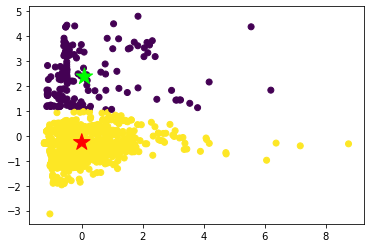

In [81]:
plt.scatter(test[:, 0], test[:, 1], c=test_clusters)
plt.scatter(test_cluster_centers[:, 0], test_cluster_centers[:, 1], c=["lime", "red"], marker='*', s=300)

### Question 4 (2 points)

Use the clustering and centroids from the training set to predict to which cluster the data points from the test set should belong.

In [82]:
train_cluster_centers = model_train.cluster_centers_
predicted_clusters = model_train.predict(test)

Plot the data from the test set with two different colors for the two clusters.

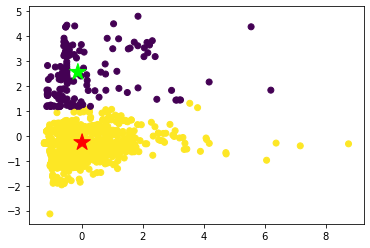

In [83]:
plt.scatter(test[:, 0], test[:, 1], c=predicted_clusters)
plt.scatter(train_cluster_centers[:, 0], train_cluster_centers[:, 1], c=["lime", "red"], marker='*', s=300)

### Question 5

## Prediction strength

Suppose we have a dataset of $X = \left\{ x_{i , j} \right\}$ of $n$ observations of $d$-dimensional variables. Let us divide these observations into a train set $X_{tr}$ and a test set $X_{te}$ of size $n_{tr}$ and $n_{te}$ respectively.

Let us choose the number of clusters $k$, and apply clustering to both the training data and the test data independently.

Let us now denote $A_{1} , A_{2} , \cdots , A_{k}$ the indices of the test observations in the test clusters $1 , 2 , \cdots , k$, and $n_{1} , n_{2} , \cdots , n_{k}$ the number of observations in these clusters.

We now consider the clusters obtained with the training data, and denote this classifying operation $C \left( X_{tr} \right)$. We now apply this classifying operation to the test set. 

Let us now denote $D_j \left[ C \left( X_{tr} , k \right) , X_{te} \right]$ the $n_{te}$ by $n_{te}$ matrix which $i i'$ element $D_j \left[ C \left( X_{tr} , k \right) , X_{te} \right] _{i i'}$ is equal to $1$ if observations $i$ and $i'$ from the $j$th cluster of the test set fall into the same training set cluster, and $0$ otherwise. The prediction strength is then defined by:

$ps \left( k \right) = \min_{ 1 \leq j \leq k} \frac{1}{n_{j} \left( n_{j } - 1 \right)} \sum_{i \neq i' \in A_{j}} D_j \left[ C \left( X_{tr} , k \right) , X_{te} \right] _{i i'}$ (**eq 1**)


Compute the prediction strength for $k$ = 2 as defined at the beginning. Hint: use **eq 1** with nested loops

In [96]:
test_labels = model_test.labels_
predicted_labels = model_train.predict(test)

scores = []

for k in np.unique(predicted_clusters):
    test_k = test[test_labels == k].tolist()
    predicted_k = predicted_labels[test_labels==k]
    
    score = 0
    for val1, predicted_cluster1 in zip(test_k, predicted_k):
        for val2, predicted_cluster2 in zip(test_k, predicted_k):
            if tuple(val1) != tuple(val2) and predicted_cluster1 == predicted_cluster2:
                score += 1
    scores.append(score / ((len(test_k)) * (len(test_k) - 1)))
prediction_strength = min(scores)

print(f"Prediction Strength: {prediction_strength:.4f}")

Prediction Strength: 0.9282


### Question 6

Write a function that does steps 1 to 5 for any number $k$ of clusters and return the prediction strength or a given $k$ number of clusters. 

In [97]:
def state_your_prediction_strength(train, test, K):
    model_train = KMeans(n_clusters=K)
    model_test = KMeans(n_clusters=K)

    model_train.fit(train)
    model_test.fit(test)
    
    test_labels = model_test.labels_
    predicted_labels = model_train.predict(test)
    
    scores = []

    for k in np.unique(predicted_labels):
        test_k = test[test_labels == k]
        predicted_k = predicted_labels[test_labels==k]

        score = 0
        for val1, predicted_cluster1 in zip(test_k, predicted_k):
            for val2, predicted_cluster2 in zip(test_k, predicted_k):
                if tuple(val1) != tuple(val2) and predicted_cluster1 == predicted_cluster2:
                    score += 1
        scores.append(score / ((len(test_k)) * (len(test_k) - 1)))
    prediction_strength = min(scores)
    
    return prediction_strength

### Question 7

Apply this function to $k = 2, \cdots , 20$.

In [128]:
import time

prediction_strengths = []

for K in range(2, 21):
    start = time.time()
    prediction_strengths.append(state_your_prediction_strength(train, test, K))
    print(f"Completed for {K} clusters in {time.time()-start:.1f} seconds")

Completed for 2 clusters in 3.5 seconds
Completed for 3 clusters in 2.1 seconds
Completed for 4 clusters in 2.0 seconds
Completed for 5 clusters in 1.4 seconds
Completed for 6 clusters in 1.1 seconds
Completed for 7 clusters in 0.9 seconds
Completed for 8 clusters in 0.9 seconds
Completed for 9 clusters in 0.9 seconds
Completed for 10 clusters in 0.8 seconds
Completed for 11 clusters in 0.8 seconds
Completed for 12 clusters in 0.7 seconds
Completed for 13 clusters in 0.7 seconds
Completed for 14 clusters in 0.7 seconds
Completed for 15 clusters in 0.7 seconds
Completed for 16 clusters in 0.6 seconds
Completed for 17 clusters in 0.7 seconds
Completed for 18 clusters in 0.6 seconds
Completed for 19 clusters in 0.6 seconds
Completed for 20 clusters in 0.6 seconds


### Question 8

Plot the prediction strength as a function of number of clusters. What is the optimal number of clusters for this dataset?

(0.0, 1.0)

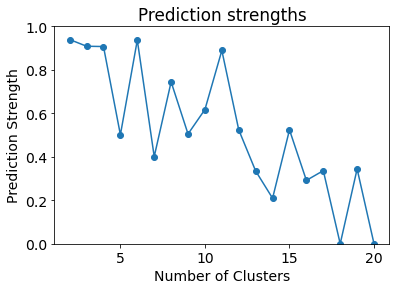

In [124]:
plt.rcParams.update({
    'font.size': 14
})

plt.plot(range(2, 21), prediction_strengths, marker='o')
plt.title("Prediction strengths")
plt.xlabel('Number of Clusters')
plt.ylabel('Prediction Strength')
plt.ylim([0, 1])

As the number of clusters increase, the prediction strength decreases. However, this is not consistent, which might indicate that the peaks in the higher number of clusters might be due to the choice of seed, and can be categorized as noise. The optimal number of cluster seems to be 2, which has the highest prediction strength. Even 6 clusters seem to have a high prediction score.